## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# **Import Libraries**

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

**Loading Dataframe**

In [198]:
rating_df=pd.read_csv(r'C:\Users\HP\Desktop\python\dsc-phase-1-project\zippedData\title.ratings.csv')
basic_df=pd.read_csv(r'C:\Users\HP\Desktop\python\dsc-phase-1-project\zippedData\title.basics.csv')
gross_df=pd.read_csv(r'C:\Users\HP\Desktop\python\dsc-phase-1-project\zippedData\bom.movie_gross.csv')
tn_budget_df=pd.read_csv(r'C:\Users\HP\Desktop\python\dsc-phase-1-project\zippedData\tn.movie_budgets.csv')



**Understanding the datasets**
##### Basic.csv dataset

We are getting to understand our dataset by knowing the datatypes,percentages of null values and presence of duplicates 

In [199]:
basic_df.info()
basic_df.head()
basic_df.shape
basic_df.duplicated().value_counts()
basic_df.isnull().sum()* 100/len(basic_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

##### Rating.csv dataset 

In [200]:
rating_df.info()
rating_df.head()
rating_df.shape
rating_df.isnull().sum()* 100/len(rating_df)
rating_df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


False    73856
dtype: int64

##### Gross.csv dataset

In [201]:
gross_df.info()
gross_df.head()
gross_df.shape
gross_df.duplicated().value_counts()
gross_df.isnull().sum()* 100/len(gross_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

##### Tn.movie budget csv

In [202]:
tn_budget_df.info()
tn_budget_df.head()
tn_budget_df.shape
tn_budget_df.duplicated().value_counts()
tn_budget_df.isnull().sum()* 100/len(tn_budget_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

Making a copy of the dataset 

In [203]:
basic_df2=basic_df.copy()
rating_df2=rating_df.copy()
gross_df2=gross_df.copy()
tn_budget_df2=tn_budget_df.copy()

Cleaning the datasets 

Cleaning the data for basic_df2

we are dropping the original_title since its repetitive and renaming the primary_title to movie_title for clarity 

In [204]:
basic_df2.drop(columns=['original_title'],inplace=True)
basic_df2.rename({'primary_title':'movie_title'}, axis=1, inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Replacing nan values with mode for basic_df2

In [205]:
basic_df2['runtime_minutes'].mode()
basic_df2['runtime_minutes'].fillna(90, inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Changing data type from float to inter for runtime_minutes 

In [206]:
basic_df2= basic_df2.astype({'runtime_minutes':'int'})
#basic_df2['runtime_minutes']= basic_df2['runtime_minutes'].astype('int32')-alternative way
basic_df2.dtypes

tconst             object
movie_title        object
start_year          int64
runtime_minutes     int32
genres             object
dtype: object

Spiltting to find the dominant genre for categorical visualization 

In [207]:
basic_df2['genres'] = basic_df['genres'].str.split(',',expand=True)
basic_df2['genres'].fillna('Unknown',inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175,Action
1,tt0066787,One Day Before the Rainy Season,2019,114,Biography
2,tt0069049,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,2018,90,Comedy
4,tt0100275,The Wandering Soap Opera,2017,80,Comedy


Cleaning the dataset for gross_df2

 Changing data type of foreign gross to inter

In [208]:
gross_df2['foreign_gross']= pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
 #gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
gross_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Dropping nan values and filling 

In [209]:
gross_df2.dropna(axis=0,subset=['domestic_gross','foreign_gross'],inplace=True) 
#gross_df2.dropna(inplace=True) alternative way
#gross_df2.dropna(axis=0,how='any',inplace=True) alternative way
gross_df2['studio'].fillna('Unknown',inplace=True)

Checking the shape after dropping

In [210]:
gross_df2.shape

(2009, 5)

Checking nun values % 

In [211]:
gross_df2.isnull().sum()* 100/len(gross_df)

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

Reset the indexing of the dataset 

In [212]:
gross_df2.reset_index(drop=True,inplace=True)
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


Cleaning dataset of tn.moviebudgets

Lets change the datatypes of domestic,budget production and worldwide gross

In [213]:
tn_budget_df2['domestic_gross'] = tn_budget_df2['domestic_gross'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df2['production_budget'] = tn_budget_df2['production_budget'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df2["worldwide_gross"] = pd.to_numeric(tn_budget_df2["worldwide_gross"].str.replace(r"[$,]", "", regex=True))

tn_budget_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(2), object(2)
memory usage: 226.0+ KB


Changing Index

Make the id the index 

In [214]:
tn_budget_df2.set_index('id', inplace=True)
#tn_budget_df2.reset_index(inplace=True) #undoing set index

In [215]:
tn_budget_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Merge Tables

Lets join basic_df2 and rating_df2 using inner join 

In [216]:
movie_df= pd.merge(basic_df2, rating_df2, how='inner', on='tconst')
movie_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,90,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80,Comedy,6.5,119


In [217]:
movie_df.head()
movie_df.info()
movie_df.shape
movie_df.duplicated().value_counts()
movie_df.isnull().sum()*100/len(movie_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   movie_title      73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  int32  
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 4.2+ MB


tconst             0.0
movie_title        0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
dtype: float64

### Overall Statistics for movie_df,gross_df2 and tn_budget_df2

In [218]:
movie_df.describe()
#movie_df.describe(include ='all') #inclusive of categorial data

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,94.173865,6.332729,3.523662e+03
std,2.614807,197.526503,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [219]:
gross_df2.describe()

,domestic_gross,foreign_gross,year
count,2.009000e+03,2.009000e+03,2009.000000
mean,4.697311e+07,7.571822e+07,2013.503235
std,8.159966e+07,1.381296e+08,2.598481
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.650000e+05,3.900000e+06,2011.000000
50%,1.650000e+07,1.930000e+07,2013.000000
75%,5.600000e+07,7.590000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [220]:
tn_budget_df2.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


### Feature Engineering 

#### Total_gross

In [221]:
tn_budget_df2['total_gross']=tn_budget_df2['domestic_gross']+ tn_budget_df2['worldwide_gross']
tn_budget_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


Return on Investment-negative roi means loss

In [222]:
tn_budget_df2['roi']=(tn_budget_df2['total_gross']-tn_budget_df2['production_budget'])/tn_budget_df2['production_budget']*100
tn_budget_df2.head()

#calculate profit 
tn_budget_df2['profit']=tn_budget_df2['total_gross']-tn_budget_df2['production_budget']
tn_budget_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,roi,profit
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,732.200683,3111852904
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,213.377435,876127750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-44.992943,-157475300
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,463.224389,1531419831
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,511.010451,1619903129


Separate release date to month,year for better visualization

In [223]:
tn_budget_df2['release_month'] = tn_budget_df2['release_date'].str.split(' ').str[0]
tn_budget_df2['release_year'] = tn_budget_df2['release_date'].str.split(' ').str[-1]
tn_budget_df2 = tn_budget_df2.drop(columns='release_date', axis=0)


tn_budget_df2.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_gross,roi,profit,release_month,release_year
id,,,,,,,,,
1,Avatar,425000000,760507625,2776345279,3536852904,732.200683,3111852904,Dec,2009
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,213.377435,876127750,May,2011
3,Dark Phoenix,350000000,42762350,149762350,192524700,-44.992943,-157475300,Jun,2019
4,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,463.224389,1531419831,May,2015
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,511.010451,1619903129,Dec,2017


### Correlation Analysis

In [225]:
correlation_matrix = tn_budget_df2.corr()
correlation_matrix

,production_budget,domestic_gross,worldwide_gross,total_gross,roi,profit
production_budget,1.000000,0.685682,0.748306,0.739912,-0.049002,0.643580
domestic_gross,0.685682,1.000000,0.938853,0.968058,0.050174,0.965476
worldwide_gross,0.748306,0.938853,1.000000,0.995194,0.031060,0.983933
total_gross,0.739912,0.968058,0.995194,1.000000,0.036887,0.991066
roi,-0.049002,0.050174,0.031060,0.036887,1.000000,0.051684
profit,0.643580,0.965476,0.983933,0.991066,0.051684,1.000000


In [ ]:
# flattern correlation
sorted_pairs= correlation_matrix.stack()
sorted_pairs.head(50)

# filter and view only strong correlations
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (sorted_pairs < 1)].drop_duplicates().sort_values(ascending=False)
strong_pairs



worldwide_gross    total_gross        0.995194
total_gross        profit             0.991066
worldwide_gross    profit             0.983933
domestic_gross     total_gross        0.968058
                   profit             0.965476
                   worldwide_gross    0.938853
production_budget  worldwide_gross    0.748306
                   total_gross        0.739912
                   domestic_gross     0.685682
                   profit             0.643580
dtype: float64

### Visualize the Correlation Matrix

<AxesSubplot:>

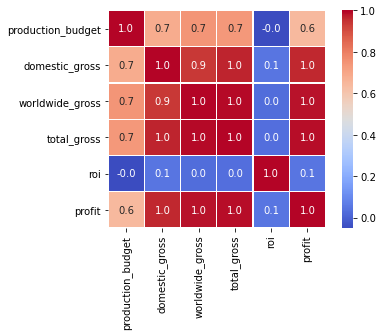

In [ ]:
sns.heatmap(correlation_matrix,annot=True,fmt=".1f",
    cmap='coolwarm',cbar=True,square=True,linewidths=0.3)

#### Correlation on the tn_budget_df2 between total_gross and Profit 
return perfect positive correlation

In [232]:
tn_budget_df2.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_gross,roi,profit,release_month,release_year
id,,,,,,,,,
1,Avatar,425000000,760507625,2776345279,3536852904,732.200683,3111852904,Dec,2009
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,213.377435,876127750,May,2011
3,Dark Phoenix,350000000,42762350,149762350,192524700,-44.992943,-157475300,Jun,2019
4,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,463.224389,1531419831,May,2015
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,511.010451,1619903129,Dec,2017


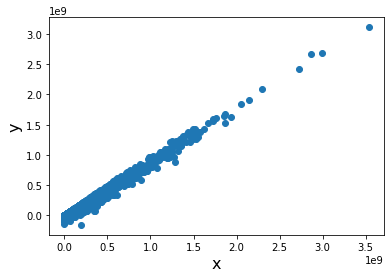

In [234]:
fig, ax= plt.subplots()

ax.scatter(tn_budget_df2['total_gross'],tn_budget_df2['profit'])

ax.set_xlabel('x', fontsize =16)
ax.set_ylabel('y', fontsize = 16)
plt.show()

#### correlation between domestic_gross and foreign_gross - gross_df2
return weak postive correlation 

In [240]:
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


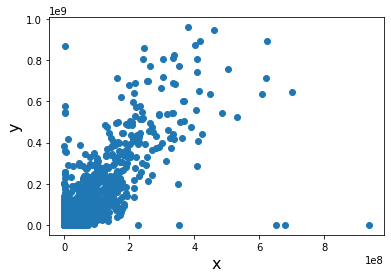

In [241]:
fig, ax= plt.subplots()

ax.scatter(gross_df2['domestic_gross'],gross_df2['foreign_gross'])

ax.set_xlabel('x', fontsize =16)
ax.set_ylabel('y', fontsize = 16)
plt.show()

### Filtering 
the movie_df 

Here to help in visualisation;

In [ ]:
movie_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,90,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80,Comedy,6.5,119


Display movie_title having runtime>=180

In [ ]:
movie_df[movie_df['runtime_minutes']>=180]['movie_title']

9                    Cooper and Hemingway: The True Gen
60                                     Den milde smerte
64                                   Burnt by the Sun 2
260                           The Last Pogo Jumps Again
507                             The Wolf of Wall Street
                              ...                      
72572    My Thesis Film: A Thesis Film by Erik Anderson
73022                                            Reason
73388                                 Leaving Neverland
73397                                   So Long, My Son
73653                         Heimat Is a Space in Time
Name: movie_title, Length: 290, dtype: object

Year with the highest voting

In [ ]:
movie_df.rename({'start_year':'year'}, axis=1, inplace=True)
movie_df.columns

Index(['tconst', 'movie_title', 'year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [ ]:
movie_df.groupby('year')['numvotes'].mean().sort_values(ascending=False)

year
2010    4488.480418
2013    4460.397622
2011    4431.113953
2012    4261.238932
2014    4107.310238
2015    3080.688721
2016    3052.597523
2017    2513.674280
2018    2193.447914
2019    1408.505046
Name: numvotes, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

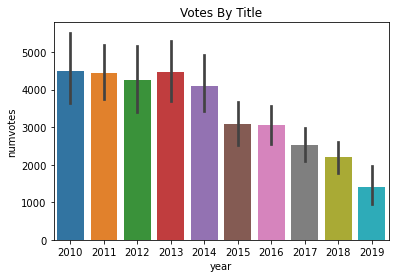

In [ ]:
sns.barplot(x='year',y='numvotes',data=movie_df)
plt.title('Votes By Title')
plt.show

Lengthy Movies Titles and Runtime

In [ ]:
movie_df.columns

Index(['tconst', 'movie_title', 'year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [ ]:
top10_len = movie_df.nlargest(10,'runtime_minutes')[['movie_title','runtime_minutes']].set_index('movie_title')

In [ ]:
top10_len

,runtime_minutes
movie_title,
Logistics,51420
Modern Times Forever,14400
The Clock,1440
Bullfighting Memories,1100
La flor,808
Europa: The Last Battle,746
Double Fine Adventure,724
Chamisso's Shadow,720
Paint Drying,607


<AxesSubplot:xlabel='runtime_minutes', ylabel='movie_title'>

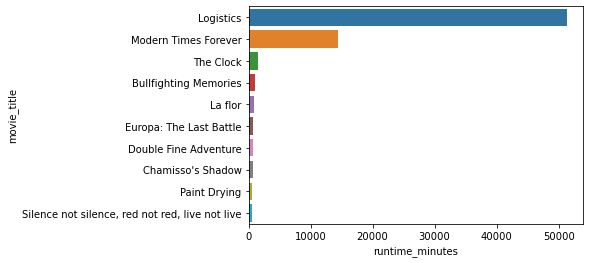

In [ ]:
sns.barplot(x='runtime_minutes', y=top10_len.index,data=top10_len)

Year With Highest Average Revenue

In [ ]:
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [ ]:
gross_df2.groupby('year')['domestic_gross'].mean().sort_values(ascending=False)


year
2018    6.222173e+07
2017    5.941676e+07
2016    5.661299e+07
2015    5.655194e+07
2013    5.279425e+07
2012    4.402413e+07
2014    4.336745e+07
2011    3.407478e+07
2010    3.285708e+07
Name: domestic_gross, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

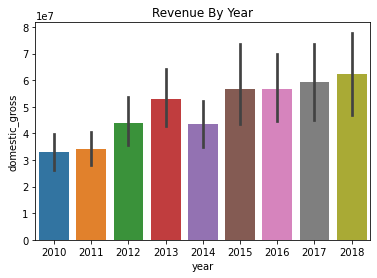

In [ ]:
sns.barplot(x='year',y='domestic_gross',data=gross_df2)
plt.title("Revenue By Year")
plt.show

In [ ]:
#movie_df[(movie_df['genres']=='runtime') & (movie_df['averagerating']<=10.0)] filtering using & operator
#movie_df[movie_df['genres'].str.contains('Drama',case=False)] filtering using str
movie_df['genres'].unique()
movie_df['genres'].value_counts() #drama has most count 


Drama          18572
Comedy         14649
Documentary    13962
Action          6988
Horror          4490
Biography       3433
Adventure       2596
Crime           2494
Thriller        1563
Animation        962
Unknown          804
Romance          786
Family           604
Mystery          433
Fantasy          429
Sci-Fi           388
Music            192
Musical          153
History          136
Sport             89
Western           75
War               47
Reality-TV         5
News               4
Game-Show          1
Adult              1
Name: genres, dtype: int64